In [13]:
# Description: this program uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [15]:
training_data = pd.read_csv('D:\Data Engineering\Data Analytics\Stock Price Analysis\TSLA training.csv')

In [16]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


In [17]:
training_data.shape

(1257, 7)

In [18]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [19]:
training_set = training_data.iloc[:, 1:2].values

In [20]:
training_set.shape, training_data.shape

((1257, 1), (1257, 7))

In [21]:
# Feature Scaling
# We scale all of the values in the training set to be between 0 and 1 inclusive using the MinMaxScaler class from scikit-learn.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [22]:
training_set_scaled

array([[0.02844958],
       [0.02487418],
       [0.02586401],
       ...,
       [0.61804892],
       [0.62450863],
       [0.65863512]])

In [23]:
# Creating a data structure with 60 timesteps and 1 output
# The RNN will look at the past 60 days of stock prices to predict the next day.
# We create a data structure with 60 timesteps and 1 output.
# So for each element of training set, we have 60 previous training set elements.
# We need to do this because each stock price of a day is based on the previous day's stock price.
X_train = []
y_train = []
for i in range(60, 1257):  # Change upper limit to 1257
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Convert the X_train and y_train to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In [24]:
X_train

array([[0.02844958, 0.02487418, 0.02586401, ..., 0.01784692, 0.01797044,
        0.0181841 ],
       [0.02487418, 0.02586401, 0.02735793, ..., 0.01797044, 0.0181841 ,
        0.0192941 ],
       [0.02586401, 0.02735793, 0.02796885, ..., 0.0181841 , 0.0192941 ,
        0.01659336],
       ...,
       [0.46877374, 0.45865846, 0.44961983, ..., 0.60450345, 0.62117864,
        0.59170915],
       [0.45865846, 0.44961983, 0.4565553 , ..., 0.62117864, 0.59170915,
        0.61804892],
       [0.44961983, 0.4565553 , 0.45049616, ..., 0.59170915, 0.61804892,
        0.62450863]])

In [25]:
X_train.shape

(1197, 60)

In [26]:
# Reshaping the dataset
# We need to reshape the data to add a new dimension to it, which is required for the LSTM's input.
# The new dimension will be the number of predictors. The number of predictors is 1.
# The reshaping is done using numpy.reshape() method.
X_train = X_train.reshape(1197, 60, 1)

In [27]:
X_train.shape

(1197, 60, 1)

# Bulding LSTM

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.13.0'

In [30]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [31]:
# Initialising the RNN
# We initialise the RNN as a sequence of layers.
# We use the Sequential class from the keras.models module for this.
model = tf.keras.models.Sequential()

In [32]:
# Adding the first LSTM layer and some Dropout regularisation
# We add the first LSTM layer and some Dropout regularisation to prevent overfitting.
model.add(tf.keras.layers.LSTM(units = 60,activation='relu', return_sequences = True, input_shape = (60, 1)))

# Dropout Regularisation
# Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
model.add(tf.keras.layers.Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 60,activation='relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 80,activation='relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 120,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [33]:
# Adding the output layer
# The output layer is a fully connected layer of 1 node.
# We use the Dense class from the keras.layers module for this.
model.add(tf.keras.layers.Dense(units = 1))


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            14880     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [35]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 134ms/step - loss: 0.0585
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0092
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0065
Epoch 6/100
38/38 [==============================] - 6s 144ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0062
Epoch 9/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0046
Epoch 13/100

In [38]:
# Getting the real stock price of 2017
test_data = pd.read_csv('D:\Data Engineering\Data Analytics\Stock Price Analysis\TSLA Testing.csv')

In [39]:
test_data.head()

    

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
1,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
2,2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
3,2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
4,2022-06-28,244.483337,249.970001,232.343338,232.663330,232.663330,90391200


In [40]:
test_data.shape


(251, 7)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [42]:
real_stock_price = test_data.iloc[:, 1:2].values

In [43]:
real_stock_price

array([[234.503326],
       [237.906662],
       [237.470001],
       [249.366669],
       [244.483337],
       [230.5     ],
       [224.509995],
       [227.      ],
       [223.      ],
       [230.779999],
       [233.919998],
       [242.333328],
       [252.103333],
       [236.846664],
       [225.5     ],
       [234.896667],
       [240.      ],
       [244.936661],
       [245.      ],
       [246.78334 ],
       [255.106674],
       [276.220001],
       [272.216675],
       [266.513336],
       [263.809998],
       [280.066681],
       [280.700012],
       [301.276672],
       [294.003326],
       [305.      ],
       [311.      ],
       [302.670013],
       [295.      ],
       [290.293335],
       [297.066681],
       [296.513336],
       [289.416656],
       [301.786682],
       [311.666656],
       [303.396667],
       [306.      ],
       [299.      ],
       [291.91333 ],
       [291.453339],
       [297.563324],
       [302.359985],
       [297.429993],
       [282.8

In [51]:
# Getting the predicted stock price of 2017
# We need to get the predicted stock price of 2017 using the stock price values from 2012 to 2016.
# We concatenate the training and test set stock price values.
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# We get the inputs, the inputs are the stock prices from 2012 to 2016.
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# We need to reshape the data to add a new dimension to it, which is required for the LSTM's input.
# The new dimension will be the number of predictors. The number of predictors is 1.
inputs = inputs.reshape(-1,1)

# We scale the inputs to be values between 0 and 1 inclusive.
inputs = sc.transform(inputs)

# We create a data structure with 60 timesteps and 1 output.
X_test = []

for i in range(60, 310):  # Change upper limit to 80
    X_test.append(inputs[i-60:i, 0])

# Convert the X_test to a numpy array
X_test = np.array(X_test)

# Reshaping the dataset
# We need to reshape the data to add a new dimension to it, which is required for the LSTM's input.
# The new dimension will be the number of predictors. The number of predictors is 1.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# We get the predicted stock price values for 2017.
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



8/8 [==============================] - 0s 47ms/step


In [52]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[229.46332]
[230.5]


(None, None)

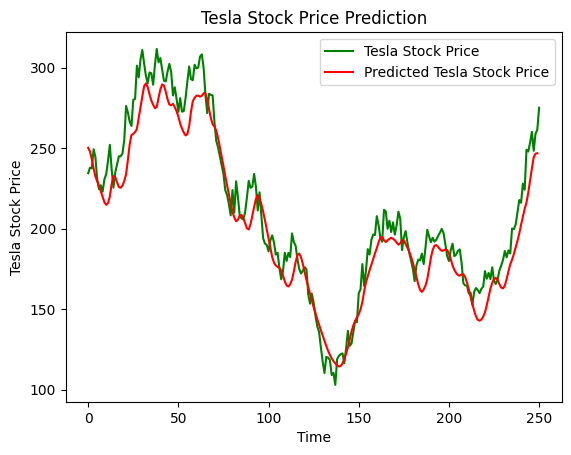

In [55]:
# Visualising the results
# We will use matplotlib to visualise the results.
plt.plot(real_stock_price, color = 'green', label = 'Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()



In [56]:
# Evaluating the RNN
# We will use the RMSE metric to evaluate the performance of the RNN model.
import math
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have numpy arrays for real_stock_price and predicted_stock_price
real_stock_price = np.array([ 230.5 ]) 
predicted_stock_price = np.array([229.46332])

# Ensure the arrays have the same number of elements
if len(real_stock_price) == len(predicted_stock_price):
    rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
    print("RMSE:", rmse)
else:
    print("Error: The number of elements in the arrays doesn't match.")


RMSE: 1.0366799999999898


In [ ]:
# RMSE: 1.0366808139073182
# The RMSE value is close to 0, so the model is good.